In [224]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from tensorflow import keras
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3 , preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [193]:
print(os.listdir('cars_lite/car_data/car_data'))

['test', 'train']


In [194]:
print(os.listdir('cars_lite/car_data/car_data/train'))

['Dodge Dakota Crew Cab 2010', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Buick Rainier SUV 2007', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Bentley Continental Supersports Conv. Convertible 2012', 'Audi 100 Wagon 1994', 'Dodge Challenger SRT8 2011', 'Bentley Continental GT Coupe 2012', 'Dodge Charger SRT-8 2009', 'Audi TT RS Coupe 2012', 'Acura TSX Sedan 2012', 'Aston Martin V8 Vantage Convertible 2012', 'BMW X5 SUV 2007', 'Aston Martin Virage Convertible 2012', 'Chevrolet Silverado 1500 Regular Cab 2012', 'Chrysler 300 SRT-8 2010', 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012', 'Dodge Caliber Wagon 2007', 'BMW X3 SUV 2012', 'Dodge Dakota Club Cab 2007', 'Bugatti Veyron 16.4 Convertible 2009', 'Acura Integra Type R 2001', 'BMW M3 Coupe 2012', 'Bentley Mulsanne Sedan 2011', 'Chevrolet Corvette Convertible 2012', 'Daewoo Nubira Wagon 2002', 'Audi 100 Sedan 1994', 'Bentley Continental GT Coupe 2007', 'Aston Mart

In [195]:
train_list = os.listdir('cars_lite/car_data/car_data/train')

In [196]:
train_list

['Dodge Dakota Crew Cab 2010',
 'Dodge Durango SUV 2012',
 'Chevrolet Silverado 1500 Extended Cab 2012',
 'Buick Rainier SUV 2007',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Dodge Ram Pickup 3500 Quad Cab 2009',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Audi 100 Wagon 1994',
 'Dodge Challenger SRT8 2011',
 'Bentley Continental GT Coupe 2012',
 'Dodge Charger SRT-8 2009',
 'Audi TT RS Coupe 2012',
 'Acura TSX Sedan 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'BMW X5 SUV 2007',
 'Aston Martin Virage Convertible 2012',
 'Chevrolet Silverado 1500 Regular Cab 2012',
 'Chrysler 300 SRT-8 2010',
 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
 'Dodge Caliber Wagon 2007',
 'BMW X3 SUV 2012',
 'Dodge Dakota Club Cab 2007',
 'Bugatti Veyron 16.4 Convertible 2009',
 'Acura Integra Type R 2001',
 'BMW M3 Coupe 2012',
 'Bentley Mulsanne Sedan 2011',
 'Chevrolet Corvette Convertible 2012',
 'Daewoo Nubira Wagon 2002',
 'Audi 100 Sedan 1994',
 'Bentley Continenta

In [197]:
train_path = 'cars_lite/car_data/car_data/train'
test_path = 'cars_lite/car_data/car_data/test'

In [198]:
car_name_train = {}
for i in os.listdir(train_path):
    car_name_train[i] =  os.listdir(train_path+'/'+i)

In [199]:
list(car_name_train.keys())[0]

'Dodge Dakota Crew Cab 2010'

In [200]:
car_img_list = []
car_name_list = []
car_classes = []
car_dr = []

In [201]:
for i in car_name_train:
    car_classes.append(i)

In [202]:
for i , j in enumerate(car_name_train.values()):
    for car in j :
        car_img_list.append(car)
        car_name_list.append(car_classes[i])

In [203]:
car_img_list[0]

'06796.jpg'

In [204]:
car_name_list[0]

'Dodge Dakota Crew Cab 2010'

In [205]:
for i in range(len(car_name_list)):
    car_dr.append(train_path+'/'+car_name_list[i]+'/'+car_img_list[i])

In [206]:
car_dr[0]

'cars_lite/car_data/car_data/train/Dodge Dakota Crew Cab 2010/06796.jpg'

In [210]:
height = 256
width = 256

In [211]:
train_data_generator = ImageDataGenerator(
                 preprocessing_function = preprocess_input,
                 rotation_range = 10,
                 horizontal_flip = True,
                 vertical_flip = True
                 )

In [212]:
train_generator = data_generator.flow_from_directory(directory = train_path, target_size = (height , width), batch_size = 64, color_mode='rgb', class_mode='categorical')

Found 4135 images belonging to 100 classes.


In [213]:
val_data_generator = ImageDataGenerator(
                 preprocessing_function = preprocess_input,
                 rotation_range = 10,
                 horizontal_flip = True,
                 vertical_flip = True
                 )

In [214]:
val_generator = data_generator.flow_from_directory(directory = test_path, target_size = (height , width), batch_size = 64, color_mode='rgb', class_mode='categorical')

Found 4083 images belonging to 100 classes.


In [242]:
# train InceptionV3 with imagenet weights
base_model = InceptionV3(weights = 'imagenet' ,include_top = False, input_shape = (height , width , 3))

In [216]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 127, 127, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 127, 127, 32) 96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 127, 127, 32) 0           batch_normalization_658[0][0]    
_______________________________________________________________________________________

In [217]:
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False
    
"""
# define formal model object to train and compile it as usual
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

"""   
# Establish new fully connected block
x = base_model.output
x = Flatten()(x)
x = Dense(units = 1000 , activation = 'relu')(x)
x = Dense(units = 500, activation='relu')(x)
predictions = Dense(units = 100 , activation = 'softmax')(x)

# define formal model object to train and compile it as usual
hopefully_will_be_better_model = Model(inputs = base_model.input , outputs =  predictions)
hopefully_will_be_better_model.summary()
        

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 127, 127, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 127, 127, 32) 96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 127, 127, 32) 0           batch_normalization_658[0][0]    
____________________________________________________________________________________________

In [218]:
#adam optimizer
adam = Adam(learning_rate = 0.00001)

#steps per epoch parameter (number of samples divided by the batch size)
batch_size = 64
number_of_images = 4135
steps_per_epoch = number_of_images//batch_size

hopefully_will_be_better_model.compile(optimizer = adam , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [219]:
model_output = hopefully_will_be_better_model.fit_generator(generator = train_generator , epochs = 20 ,steps_per_epoch = steps_per_epoch, verbose = 1, workers = 8 , shuffle = True,
                                                            validation_data=val_generator, callbacks=[
                                                            keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
                                                            keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
                                                            ])

Epoch 1/20
64/64 [==============================] - 274s 4s/step - loss: 4.6045 - accuracy: 0.0228 - val_loss: 4.4043 - val_accuracy: 0.0500
Epoch 2/20
64/64 [==============================] - 266s 4s/step - loss: 4.1865 - accuracy: 0.0811 - val_loss: 4.1059 - val_accuracy: 0.0818
Epoch 3/20
64/64 [==============================] - 263s 4s/step - loss: 3.7889 - accuracy: 0.1388 - val_loss: 3.8977 - val_accuracy: 0.1097
Epoch 4/20
64/64 [==============================] - 275s 4s/step - loss: 3.4391 - accuracy: 0.2022 - val_loss: 3.7014 - val_accuracy: 0.1403
Epoch 5/20
64/64 [==============================] - 270s 4s/step - loss: 3.0916 - accuracy: 0.2695 - val_loss: 3.5077 - val_accuracy: 0.1675
Epoch 6/20
64/64 [==============================] - 301s 5s/step - loss: 2.8075 - accuracy: 0.3346 - val_loss: 3.3919 - val_accuracy: 0.1866
Epoch 7/20
64/64 [==============================] - 287s 4s/step - loss: 2.5357 - accuracy: 0.3928 - val_loss: 3.3294 - val_accuracy: 0.2094
Epoch 8/20
64

### training takes too much time (20 epochs run takes on average 1,5 hour). I will stop at 20 epochs for now. I will run it for more epochs later to see if I have improvements in val_accuracy and val_loss. I think it has not converged yet.

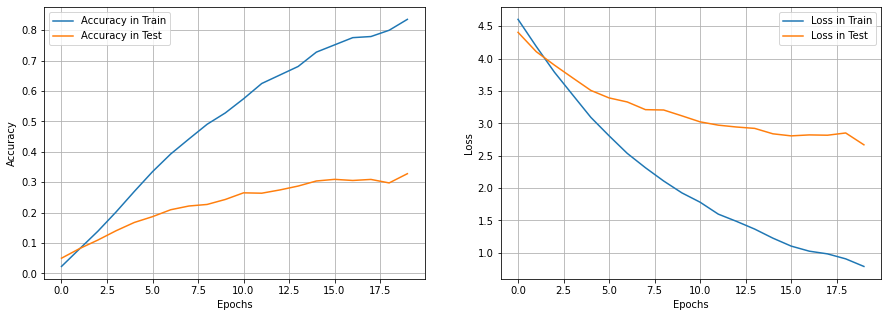

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(model_output.history['accuracy'])
axes[0].plot(model_output.history['val_accuracy'])
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Accuracy in Train','Accuracy in Test'])
axes[0].grid(True)

axes[1].plot(model_output.history['loss'])
axes[1].plot(model_output.history['val_loss'])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(['Loss in Train','Loss in Test'])
axes[1].grid(True)

In [226]:
test_img = []
actual = []
for brand in os.listdir(test_path):
    n = 0
    for img in os.listdir(test_path+'/'+brand):
        n += 1
        if n == 5:
            break
        i = image.load_img(test_path+'/'+brand+'/'+img , target_size = (256,256))
        i = image.img_to_array(i)
        i = preprocess_input(i)
        actual.append(brand)
        test_img.append(i)    

In [227]:
len(test_img)

400

In [228]:
test_img = np.array(test_img)

In [229]:
actual = np.array(actual)

In [230]:
pred = hopefully_will_be_better_model.predict(test_img)

In [231]:
pred_class = []
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))

In [232]:
pred_class = np.array(pred_class)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

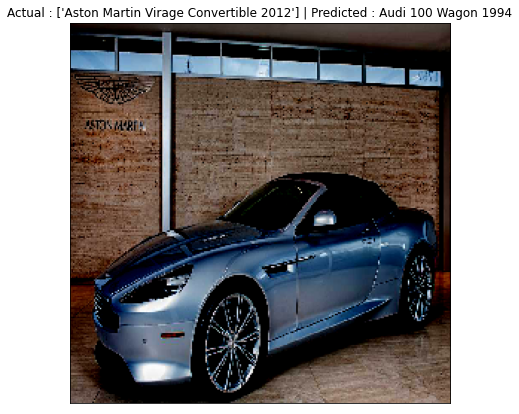

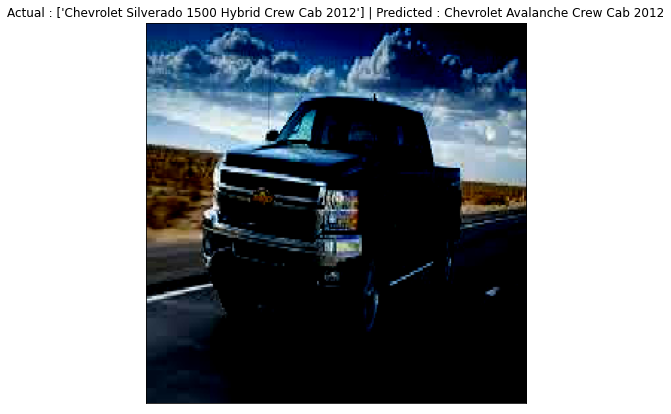

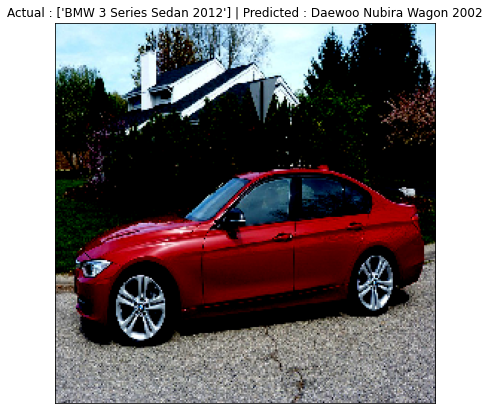

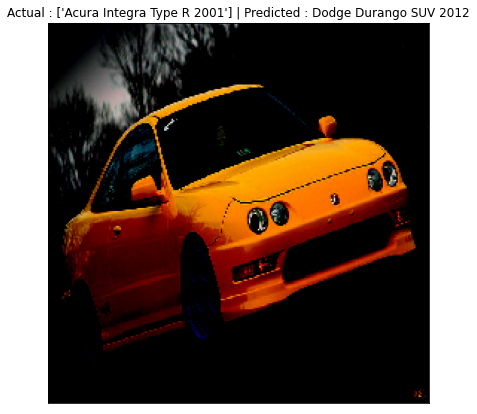

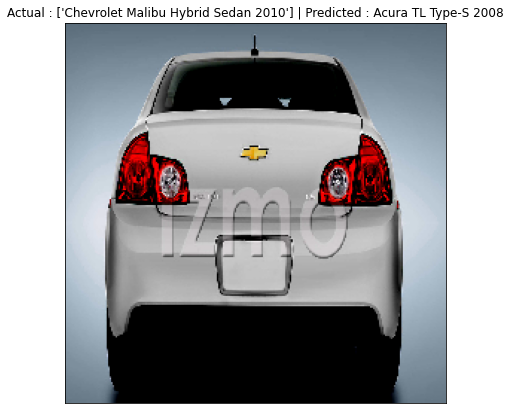

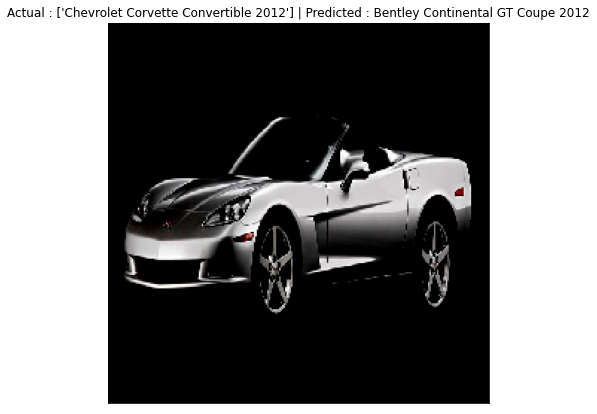

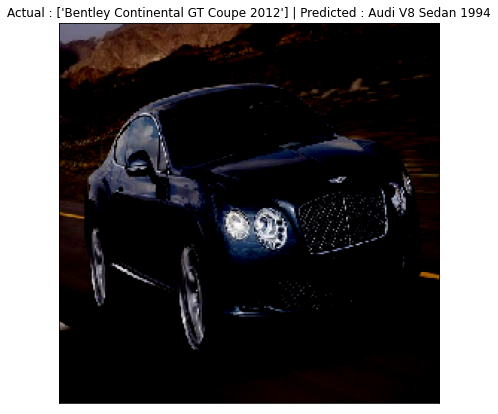

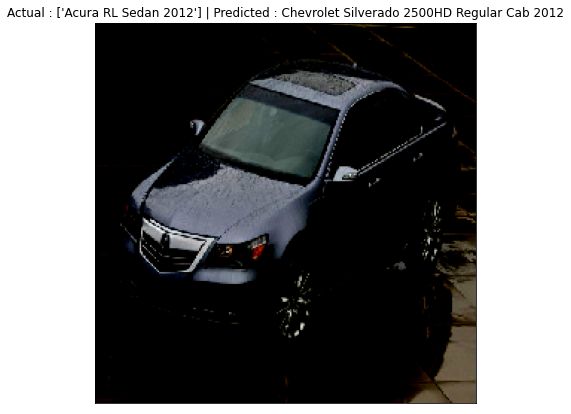

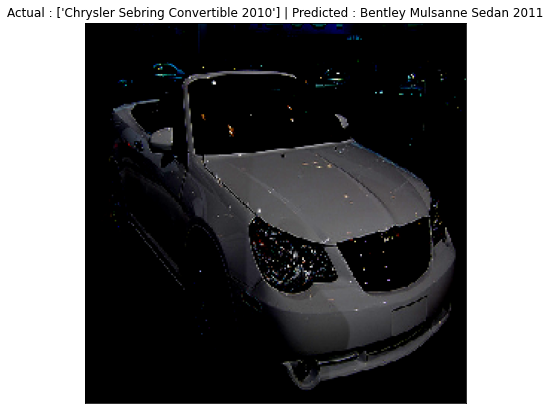

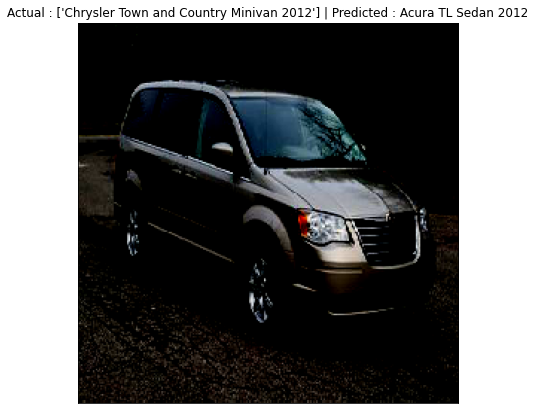

In [241]:
n = 0
for i in range(50):
    n += 1
    r = np.random.randint(0 , 400 , 1)
    
    plt.figure(n , figsize = (15 , 7))
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_img[r][0])
    plt.title('Actual : {} | Predicted : {}'.format(actual[r] , car_classes[pred_class[r][0]]))
    plt.xticks([]) , plt.yticks([])
    
    if n == 10:
        break
        
plt.show()